<h1 style="text-align: center; color: white; font-size: 2em; padding: 25px; background: linear-gradient(90deg, #FFC0CB, #212F3D);">CrimeWatch - L.A. Crime Data Analysis</h1>

This project focuses on analyzing the "Crime Data from 2010 to 2019" dataset from [Los Angeles Open Data](https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/about_data/) by conducting an Exploratory Data Analysis (EDA) to uncover and visualize patterns and trends.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/02. Crime_Data_from_2010_to_2019_20240917.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [3]:
# Map old column names to new column names using the provided mapping dictionary.
column_rename_mapping = {
    'DR_NO': 'Record Number',
    'Date Rptd': 'Date Reported',
    'DATE OCC': 'Date Occurred',
    'TIME OCC': 'Time Occurred',
    'AREA ': 'Geographic Area ID',
    'AREA NAME': 'Geographic Area Name',
    'Rpt Dist No': 'Reporting District Number',
    'Part 1-2': 'Part 1-2',
    'Crm Cd': 'Crime Code',
    'Crm Cd Desc': 'Crime Description',
    'Mocodes': 'Modus Operandi (MO) Codes',
    'Vict Age': 'Victim Age',
    'Vict Sex': 'Victim Gender',
    'Vict Descent': 'Victim Ethnicity',
    'Premis Cd': 'Premises Code',
    'Premis Desc': 'Premises Description',
    'Weapon Used Cd': 'Weapon Used Code',
    'Weapon Desc': 'Weapon Description',
    'Status': 'Case Status',
    'Status Desc': 'Status Description',
    'Crm Cd 1': 'Crime Code 1',
    'Crm Cd 2': 'Crime Code 2',
    'Crm Cd 3': 'Crime Code 3',
    'Crm Cd 4': 'Crime Code 4',
    'LOCATION': 'Crime Location',
    'Cross Street': 'Nearest Cross Street',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}

df = df.rename(columns=column_rename_mapping)

In [4]:
# As you can see from this output, several columns exhibit null or missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122998 entries, 0 to 2122997
Data columns (total 28 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Record Number              int64  
 1   Date Reported              object 
 2   Date Occurred              object 
 3   Time Occurred              int64  
 4   Geographic Area ID         int64  
 5   Geographic Area Name       object 
 6   Reporting District Number  int64  
 7   Part 1-2                   int64  
 8   Crime Code                 int64  
 9   Crime Description          object 
 10  Modus Operandi (MO) Codes  object 
 11  Victim Age                 int64  
 12  Victim Gender              object 
 13  Victim Ethnicity           object 
 14  Premises Code              float64
 15  Premises Description       object 
 16  Weapon Used Code           float64
 17  Weapon Description         object 
 18  Case Status                object 
 19  Status Description         object 
 20  Cr

In [5]:
# Calculate the count and percentage of null values for each column.
null_count = df.isnull().sum()
null_percentage = df.isnull().mean() * 100

# Create a DataFrame to display both count and percentage.
pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage': null_percentage
})

,Null Count,Null Percentage
Record Number,0,0.000000
Date Reported,0,0.000000
Date Occurred,0,0.000000
Time Occurred,0,0.000000
Geographic Area ID,0,0.000000
Geographic Area Name,0,0.000000
Reporting District Number,0,0.000000
Part 1-2,0,0.000000
Crime Code,0,0.000000
Crime Description,0,0.000000


In [6]:
# Filter out rows with negative values in the 'Victim Age' column.
df = df[df['Victim Age'] >= 0]

In [7]:
df['Victim Gender'].unique()

array(['M', 'F', nan, 'X', 'H', '-', 'N'], dtype=object)

In [8]:
for category in df['Victim Gender'].unique():
    count = len(df[df['Victim Gender'] == category])
    print(f"Number of entries with Victim Gender '{category}': {count}")

Number of entries with Victim Gender 'M': 976665
Number of entries with Victim Gender 'F': 893626
Number of entries with Victim Gender 'nan': 0
Number of entries with Victim Gender 'X': 55064
Number of entries with Victim Gender 'H': 73
Number of entries with Victim Gender '-': 1
Number of entries with Victim Gender 'N': 17


In [9]:
# Considering the low number of instances of unknown values in the 'Victim Gender' column, drop rows with values 'H', 'N', and '-' in this column.
df = df[(df['Victim Gender'] != 'H') & (df['Victim Gender'] != 'N') & (df['Victim Gender'] != '-')]

# Drop rows with missing values in this column.
df = df.dropna(subset=['Victim Gender'])

# Map values in the 'Victim Gender' column to their corresponding genders: 'F' to 'Female', 'M' to 'Male', and 'X' to 'Unknown'.
df['Victim Gender'] = df['Victim Gender'].map({'F': 'Female', 'M': 'Male', 'X': 'Unknown'})

In [10]:
for category in df['Victim Ethnicity'].unique():
    count = len(df[df['Victim Ethnicity'] == category])
    print(f"Number of entries with Victim Ethnicity '{category}': {count}")

Number of entries with Victim Ethnicity 'H': 728857
Number of entries with Victim Ethnicity 'W': 511913
Number of entries with Victim Ethnicity 'B': 336436
Number of entries with Victim Ethnicity 'A': 51260
Number of entries with Victim Ethnicity 'O': 203470
Number of entries with Victim Ethnicity 'X': 78036
Number of entries with Victim Ethnicity 'K': 9231
Number of entries with Victim Ethnicity 'I': 957
Number of entries with Victim Ethnicity 'J': 420
Number of entries with Victim Ethnicity 'F': 2582
Number of entries with Victim Ethnicity 'C': 1087
Number of entries with Victim Ethnicity 'P': 351
Number of entries with Victim Ethnicity 'V': 214
Number of entries with Victim Ethnicity 'U': 193
Number of entries with Victim Ethnicity 'G': 82
Number of entries with Victim Ethnicity 'D': 24
Number of entries with Victim Ethnicity 'nan': 0
Number of entries with Victim Ethnicity 'S': 32
Number of entries with Victim Ethnicity 'Z': 140
Number of entries with Victim Ethnicity 'L': 20
Numbe

In [11]:
# Considering the low number of instances of unknown values in the 'Victim Ethnicity' column, drop rows with the value '-' in this column.
df = df[(df['Victim Ethnicity'] != '-')]

# Considering the low percentage of NaN values in the 'Victim Ethnicity' column after dropping rows with missing values in the 'Victim Gender' column, drop rows with missing values in this column.
df = df.dropna(subset=['Victim Ethnicity'])

# Map values in the 'Victim Ethnicity' column to their corresponding ethnicities using the provided mapping dictionary.
descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

df['Victim Ethnicity'] = df['Victim Ethnicity'].map(descent_mapping)

In [12]:
# Considering the low percentage of NaN values in the 'Modus Operandi (MO) Codes' column after dropping rows with missing values in the 'Victim Gender' column, drop rows with missing values in this column.
df = df.dropna(subset=['Modus Operandi (MO) Codes'])

In [13]:
# Considering the high percentage of NaN values in the 'Weapon Used Code', 'Weapon Description', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', and 'Nearest Cross Street' columns, drop these columns.
# Dropping the 'Crime Code 1' column as it duplicates information already captured by 'Crime Code'.
# Dropping the 'Part 1-2' column as its representation is unclear.
df = df.drop(['Weapon Used Code', 'Weapon Description', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Nearest Cross Street', 'Crime Code 1', 'Part 1-2'], axis=1)

In [14]:
# Considering the low percentage of NaN values in the 'Premises Description' and 'Case Status' columns, drop rows with missing values in these columns.
df = df.dropna(subset=['Premises Description', 'Case Status'])

In [15]:
# Convert the 'Date Reported' and 'Date Occurred' columns to a datetime object for consistency.
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%m/%d/%Y %I:%M:%S %p')
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'], format='%m/%d/%Y %I:%M:%S %p')

In [16]:
# Extract day of the week, day, month, and year information from the 'Date Reported' column and assign them to new columns.
df['Reported Day of Week'] = df['Date Reported'].dt.day_name()
df['Reported Day'] = df['Date Reported'].dt.day
df['Reported Month'] = df['Date Reported'].dt.month
df['Reported Year'] = df['Date Reported'].dt.year

# Extract year and month from the 'Date Reported' column.
df['Reported Year and Month'] = df['Date Reported'].dt.to_period('M')

# Extract week of the month from the 'Date Reported' column.
df['Reported Week of Month'] = df['Date Reported'].apply(lambda x: (x.day - 1) // 7 + 1)
# df['Reported Week of Month'] = df['Date Reported'].apply(lambda x: min((x.day - 1) // 7 + 1, 4))

# Extract season from 'Reported Month' column.
# Winter (1): December, January, February
# Spring (2): March, April, May
# Summer (3): June, July, August
# Fall (4): September, October, November
df['Reported Season'] = (df['Reported Month'] % 12 // 3 + 1)

# Map season numbers to season names.
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Reported Season'] = df['Reported Season'].map(season_map)



# Extract day of the week, day, month, and year information from the 'Date Occurred' column and assign them to new columns.
df['Occurred Day of Week'] = df['Date Occurred'].dt.day_name()
df['Occurred Day'] = df['Date Occurred'].dt.day
df['Occurred Month'] = df['Date Occurred'].dt.month
df['Occurred Year'] = df['Date Occurred'].dt.year

# Extract year and month from the 'Date Occurred' column.
df['Occurred Year and Month'] = df['Date Occurred'].dt.to_period('M')

# Extract week of the month from the 'Date Occurred' column.
df['Occurred Week of Month'] = df['Date Occurred'].apply(lambda x: (x.day - 1) // 7 + 1)
# df['Occurred Week of Month'] = df['Date Occurred'].apply(lambda x: min((x.day - 1) // 7 + 1, 4))

# Extract season from 'Occurred Month' column.
# Winter (1): December, January, February
# Spring (2): March, April, May
# Summer (3): June, July, August
# Fall (4): September, October, November
df['Occurred Season'] = (df['Occurred Month'] % 12 // 3 + 1)

# Map season numbers to season names.
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Occurred Season'] = df['Occurred Season'].map(season_map)

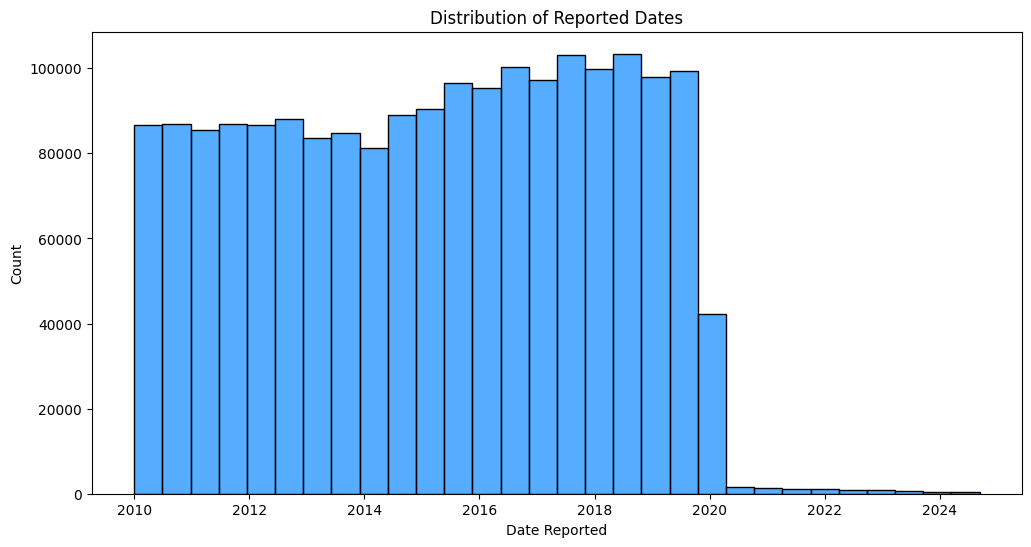

In [17]:
# 01. What is the distribution of reported dates?
plt.figure(figsize=(12, 6), dpi=100)
sns.histplot(data=df, x='Date Reported', bins=30, color='dodgerblue')
plt.title('Distribution of Reported Dates')
plt.show()

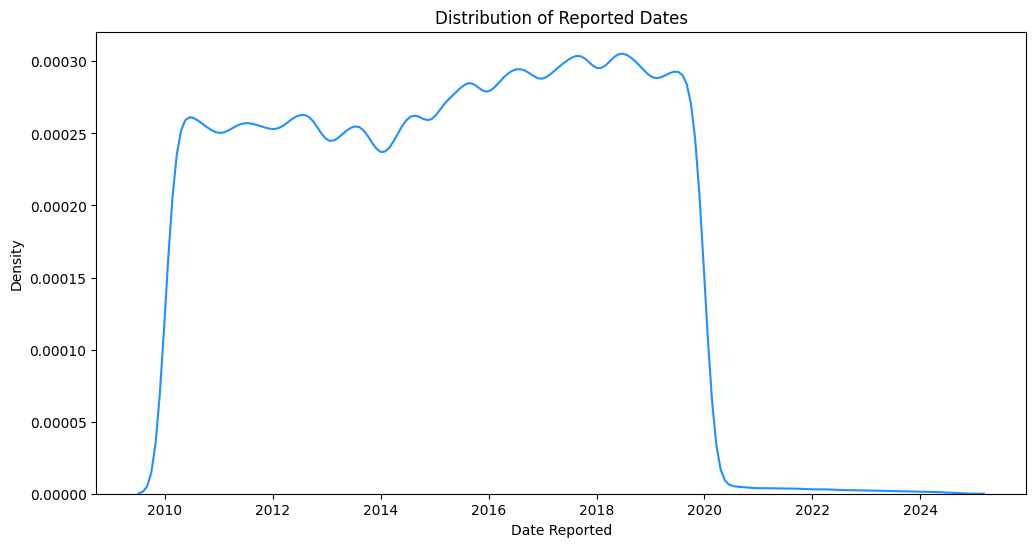

In [18]:
# 01. What is the distribution of reported dates?
plt.figure(figsize=(12, 6), dpi=100)
sns.kdeplot(data=df, x='Date Reported', color='dodgerblue')
plt.title('Distribution of Reported Dates')
plt.show()

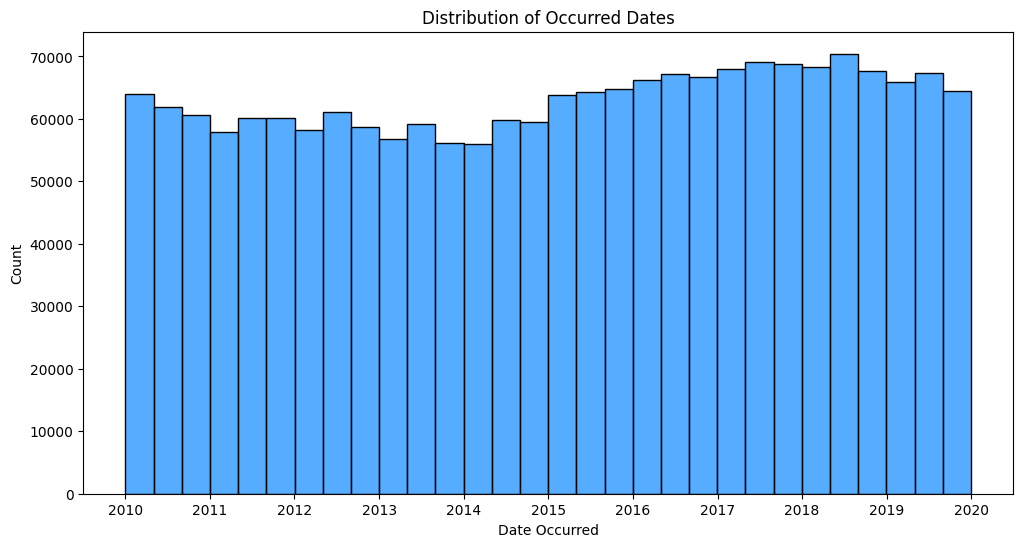

In [19]:
# 02. What is the distribution of occurred dates?
plt.figure(figsize=(12, 6), dpi=100)
sns.histplot(data=df, x='Date Occurred', bins=30, color='dodgerblue')
plt.title('Distribution of Occurred Dates')
plt.show()

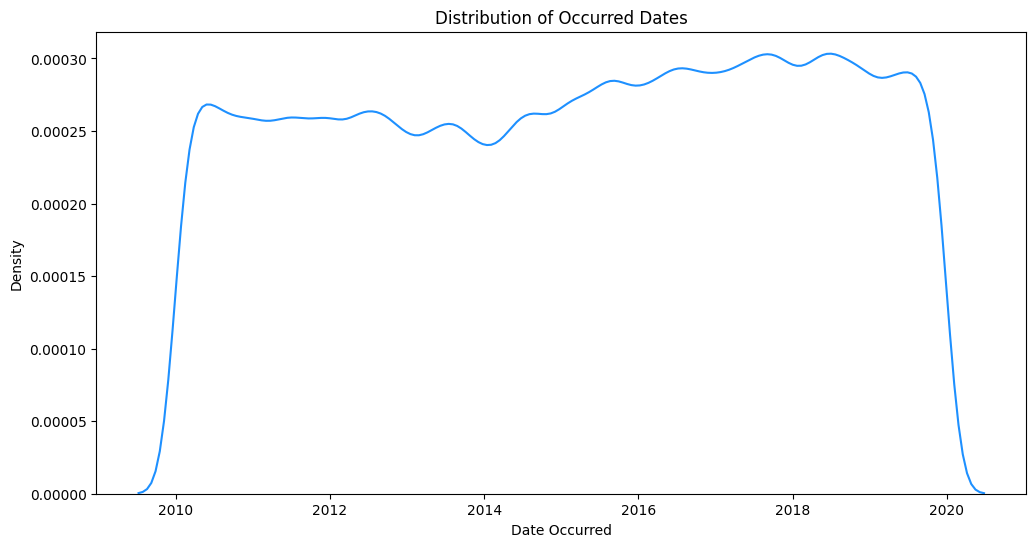

In [20]:
# 02. What is the distribution of occurred dates?
plt.figure(figsize=(12, 6), dpi=100)
sns.kdeplot(data=df, x='Date Occurred', color='dodgerblue')
plt.title('Distribution of Occurred Dates')
plt.show()

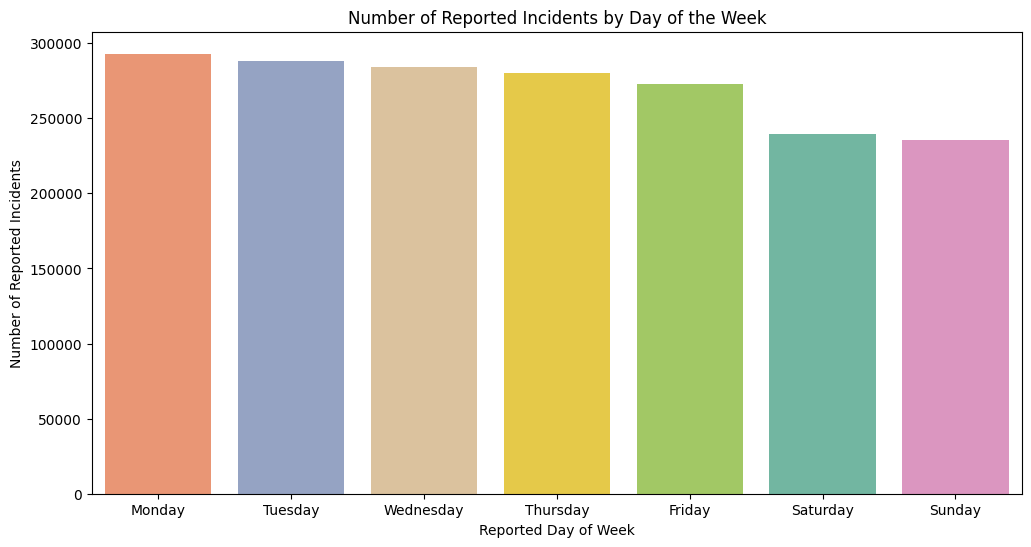

In [21]:
# 03. How does the number of reported incidents vary by day of the week?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Reported Day of Week', hue='Reported Day of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2', legend=False)
plt.title('Number of Reported Incidents by Day of the Week')
plt.ylabel('Number of Reported Incidents')
plt.show()

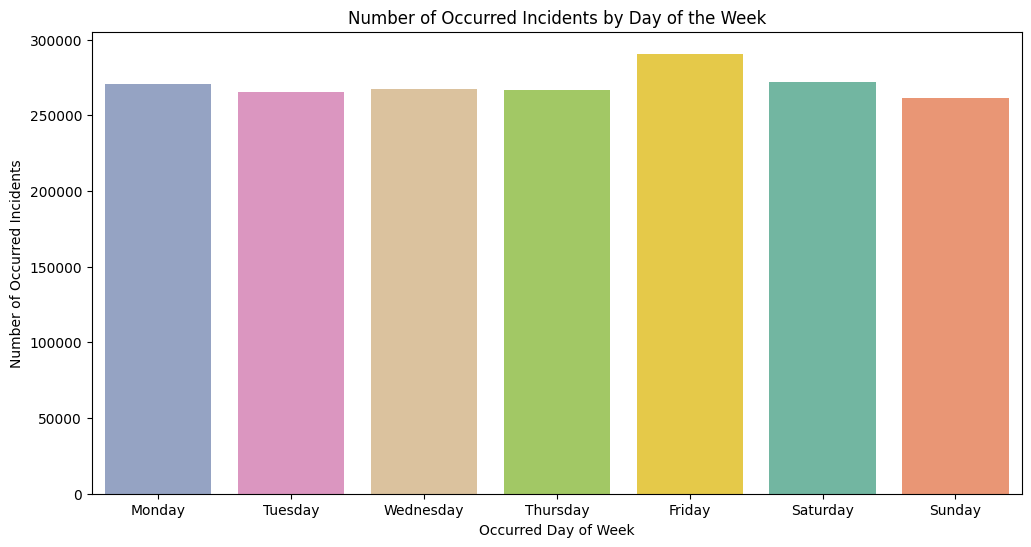

In [22]:
# 04. How does the number of occurred incidents vary by day of the week?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Occurred Day of Week', hue='Occurred Day of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2', legend=False)
plt.title('Number of Occurred Incidents by Day of the Week')
plt.ylabel('Number of Occurred Incidents')
plt.show()

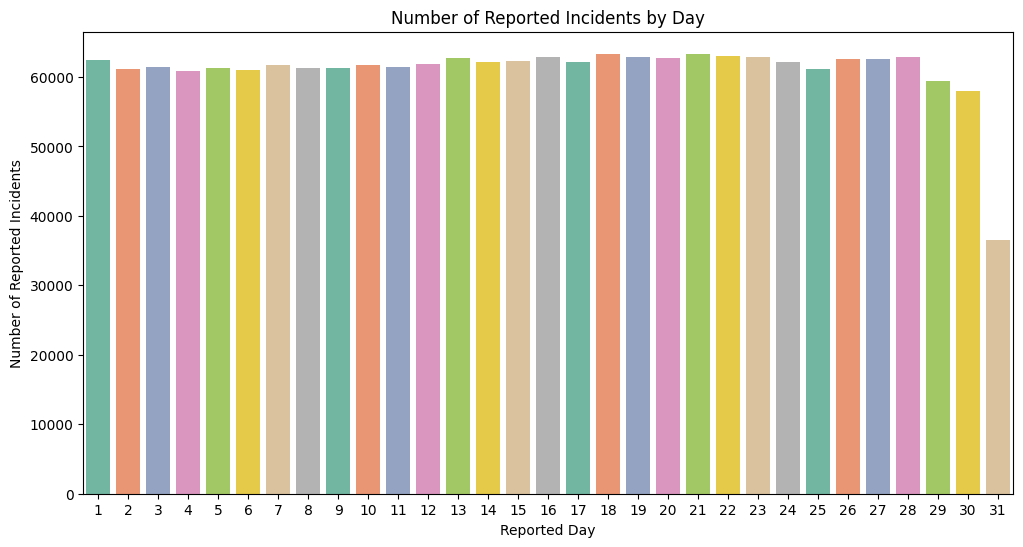

In [23]:
# 05. How does the number of reported incidents vary by day?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Reported Day', hue='Reported Day', palette='Set2', legend=False)
plt.title('Number of Reported Incidents by Day')
plt.ylabel('Number of Reported Incidents')
plt.show()

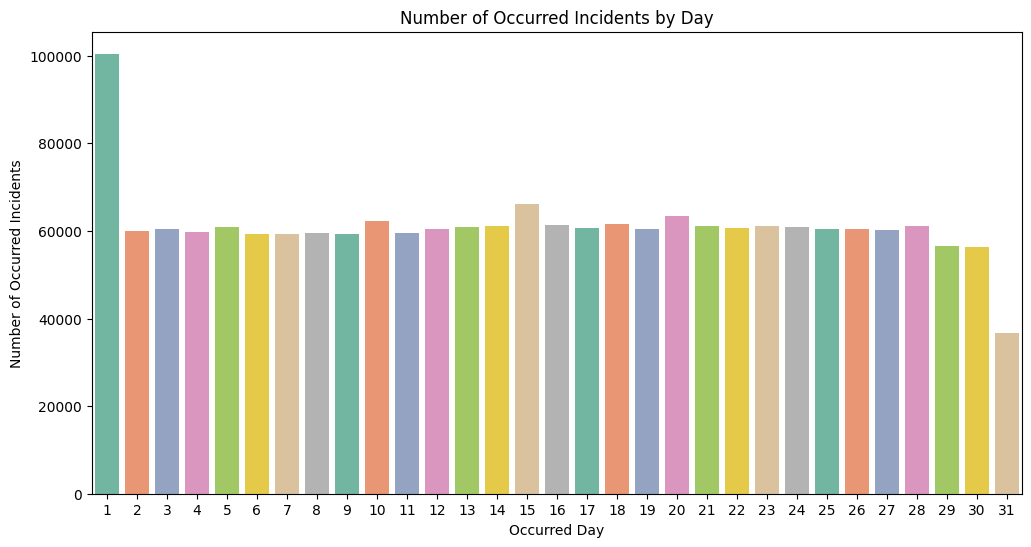

In [24]:
# 06. How does the number of occurred incidents vary by day?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Occurred Day', hue='Occurred Day', palette='Set2', legend=False)
plt.title('Number of Occurred Incidents by Day')
plt.ylabel('Number of Occurred Incidents')
plt.show()

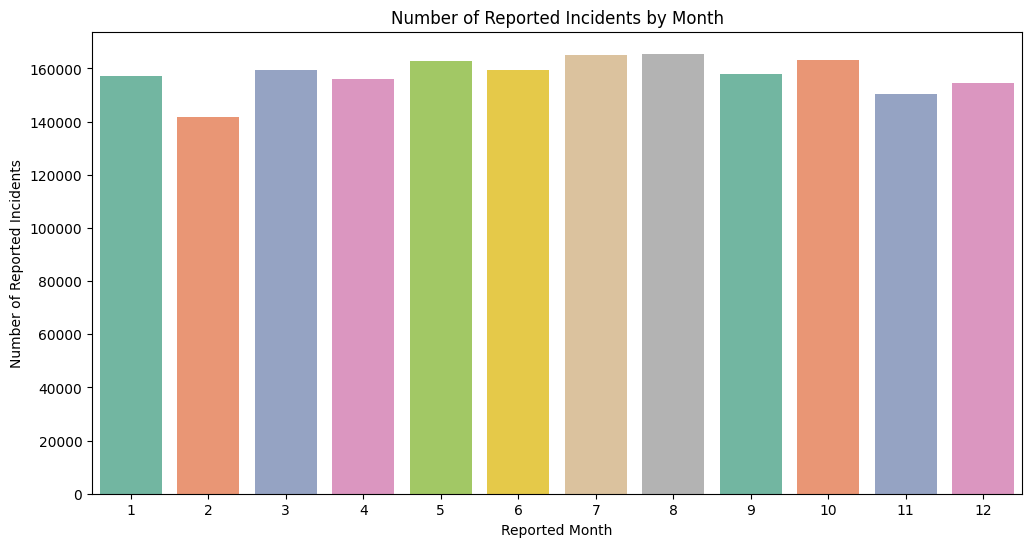

In [25]:
# 07. How does the number of reported incidents vary by month?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Reported Month', hue='Reported Month', palette='Set2', legend=False)
plt.title('Number of Reported Incidents by Month')
plt.ylabel('Number of Reported Incidents')
plt.show()

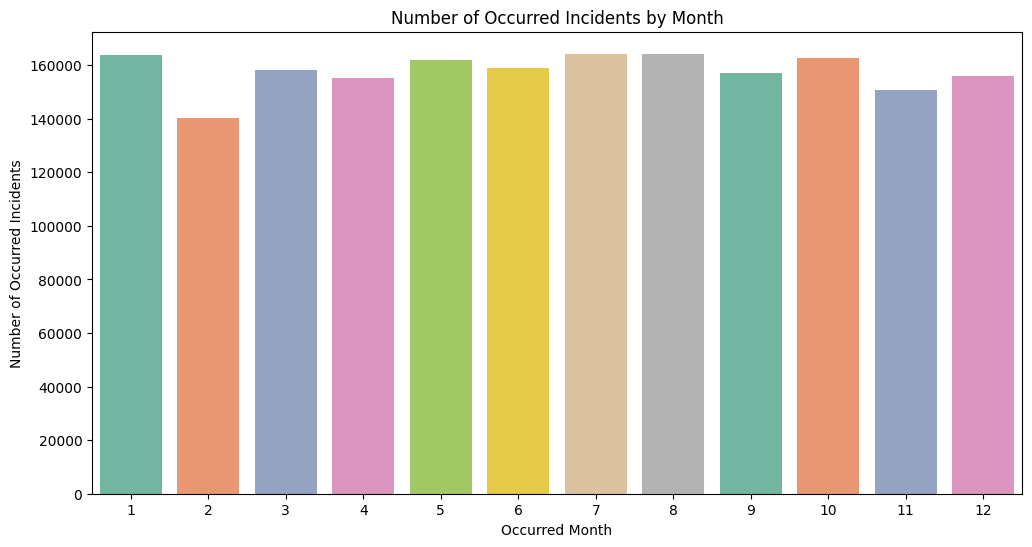

In [26]:
# 08. How does the number of occurred incidents vary by month?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Occurred Month', hue='Occurred Month', palette='Set2', legend=False)
plt.title('Number of Occurred Incidents by Month')
plt.ylabel('Number of Occurred Incidents')
plt.show()

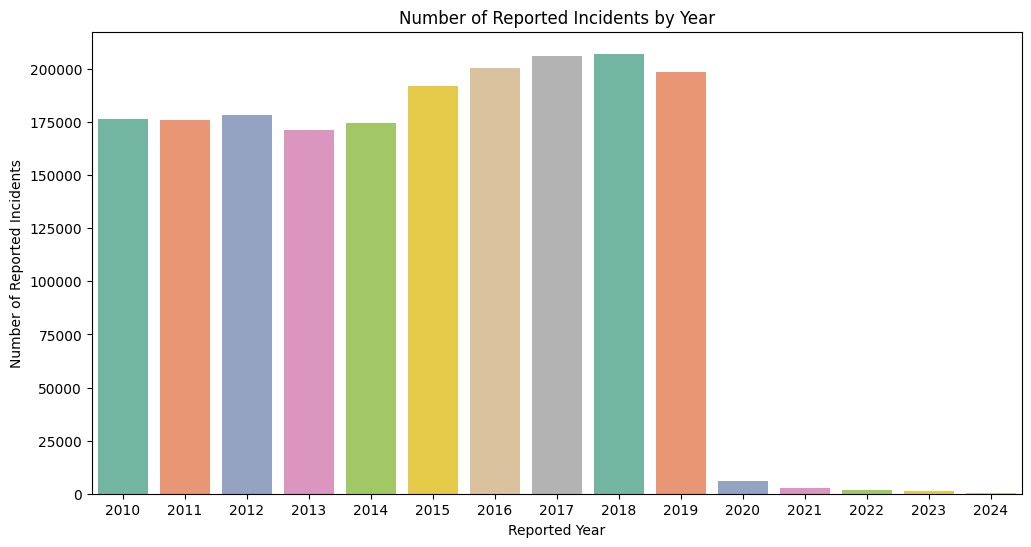

In [27]:
# 09. How does the number of reported incidents vary by year?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Reported Year', hue='Reported Year', palette='Set2', legend=False)
plt.title('Number of Reported Incidents by Year')
plt.ylabel('Number of Reported Incidents')
plt.show()

In [28]:
# 09. How does the number of reported incidents vary by year?
df['Reported Year'].value_counts().reset_index(name='Number of Reported Incidents')

,Reported Year,Number of Reported Incidents
0,2018,207187
1,2017,206038
2,2016,200651
3,2019,198574
4,2015,192136
5,2012,178313
6,2010,176466
7,2011,175806
8,2014,174514
9,2013,171435


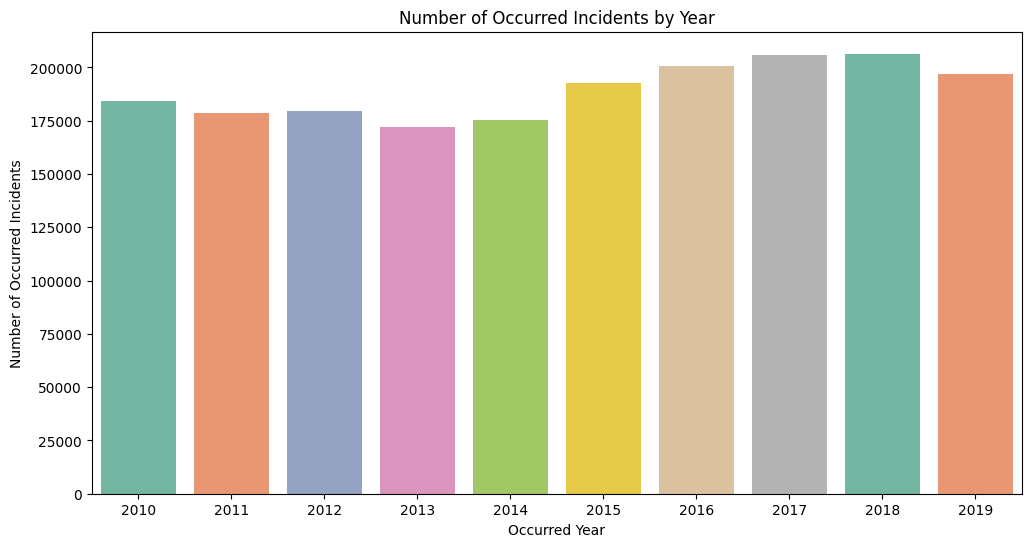

In [29]:
# 10. How does the number of occurred incidents vary by year?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Occurred Year', hue='Occurred Year', palette='Set2', legend=False)
plt.title('Number of Occurred Incidents by Year')
plt.ylabel('Number of Occurred Incidents')
plt.show()

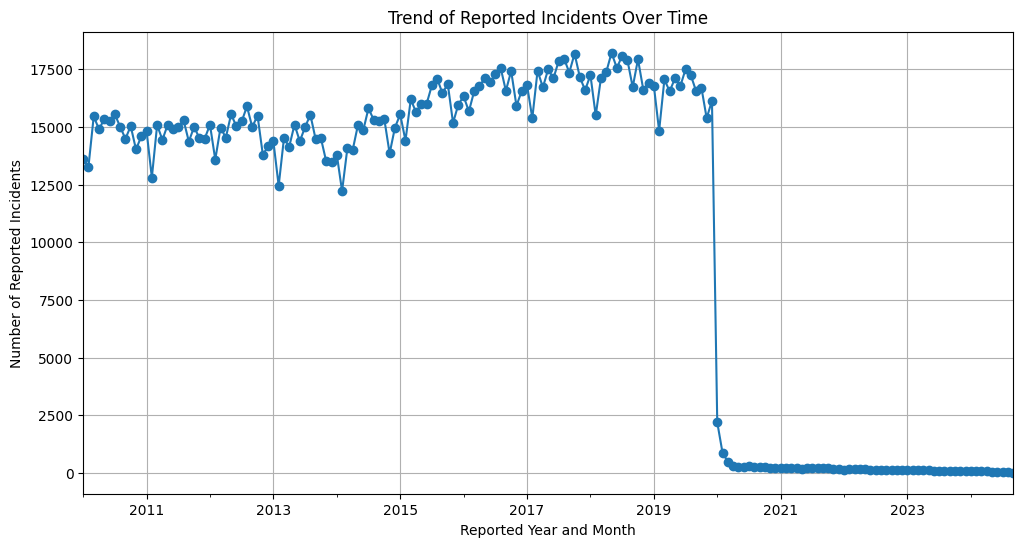

In [30]:
# 11. How does the number of reported incidents vary over months and years?
# Count the number of reported incidents per month.
monthly_calls = df['Reported Year and Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6), dpi=100)
monthly_calls.plot(marker='o')
plt.title('Trend of Reported Incidents Over Time')
plt.ylabel('Number of Reported Incidents')
plt.grid(True)
plt.show()

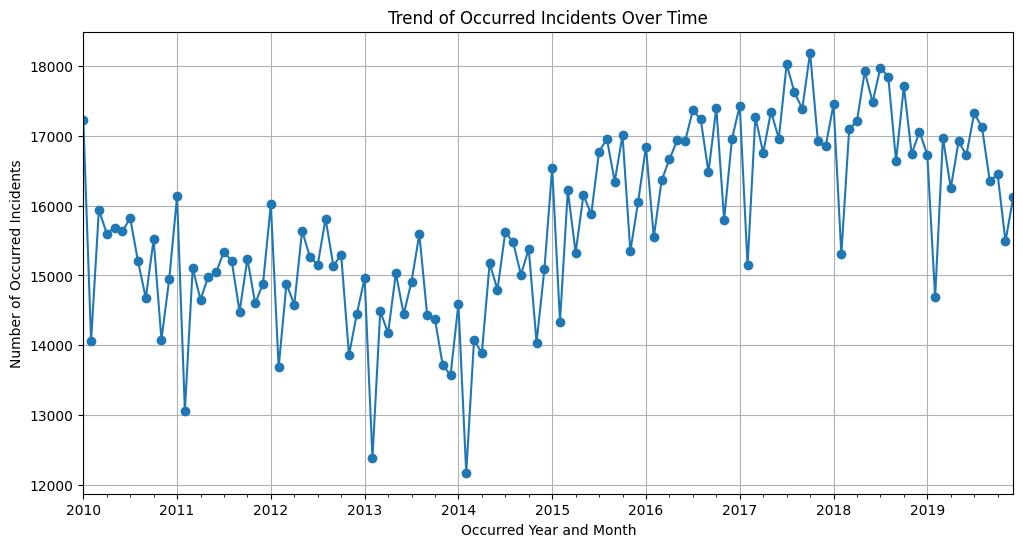

In [31]:
# 12. How does the number of occurred incidents vary over months and years?
# Count the number of occurred incidents per month.
monthly_calls = df['Occurred Year and Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6), dpi=100)
monthly_calls.plot(marker='o')
plt.title('Trend of Occurred Incidents Over Time')
plt.ylabel('Number of Occurred Incidents')
plt.grid(True)
plt.show()

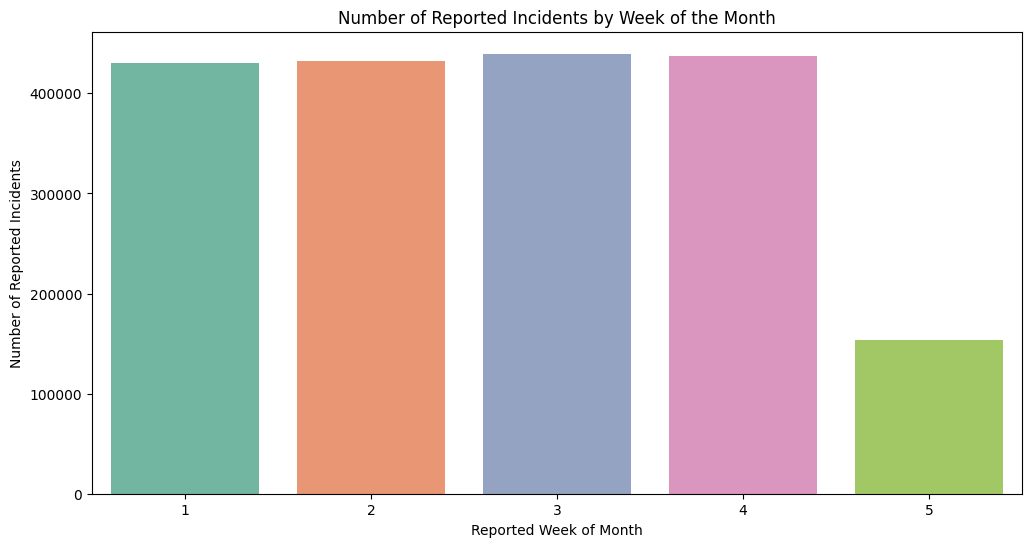

In [32]:
# 13. Does the number of reported incidents increase at the beginning or end of the month?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Reported Week of Month', hue='Reported Week of Month', palette='Set2', legend=False)
plt.title('Number of Reported Incidents by Week of the Month')
plt.ylabel('Number of Reported Incidents')
plt.show()

In [33]:
# 13. Does the number of reported incidents increase at the beginning or end of the month?
df['Reported Week of Month'].value_counts().sort_index().reset_index(name='Number of Reported Incidents')

,Reported Week of Month,Number of Reported Incidents
0,1,430025
1,2,432522
2,3,439594
3,4,437132
4,5,153949


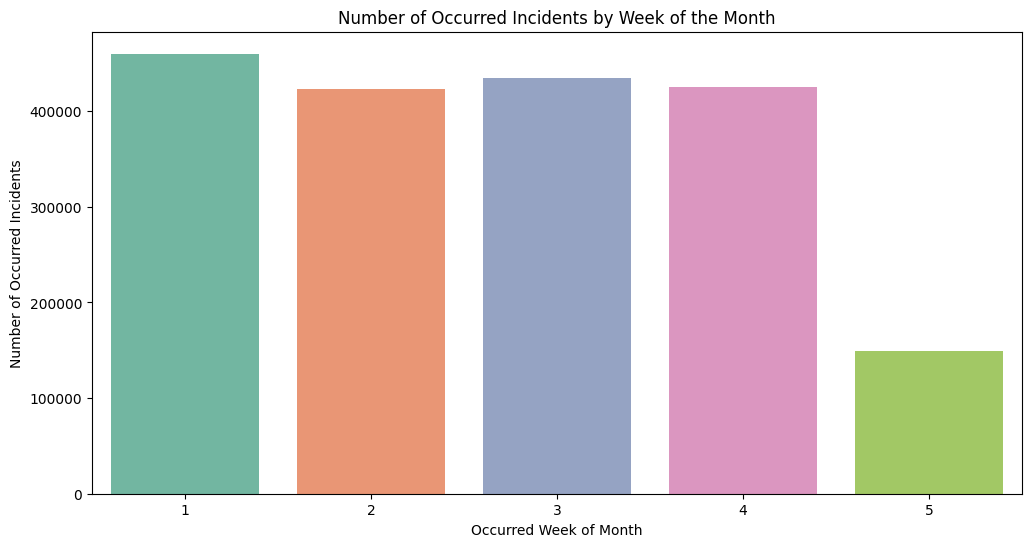

In [34]:
# 14. Does the number of occurred incidents increase at the beginning or end of the month?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Occurred Week of Month', hue='Occurred Week of Month', palette='Set2', legend=False)
plt.title('Number of Occurred Incidents by Week of the Month')
plt.ylabel('Number of Occurred Incidents')
plt.show()

In [35]:
# 14. Does the number of occurred incidents increase at the beginning or end of the month?
df['Occurred Week of Month'].value_counts().sort_index().reset_index(name='Number of Reported Incidents')

,Occurred Week of Month,Number of Reported Incidents
0,1,460033
1,2,423353
2,3,435025
3,4,425143
4,5,149668


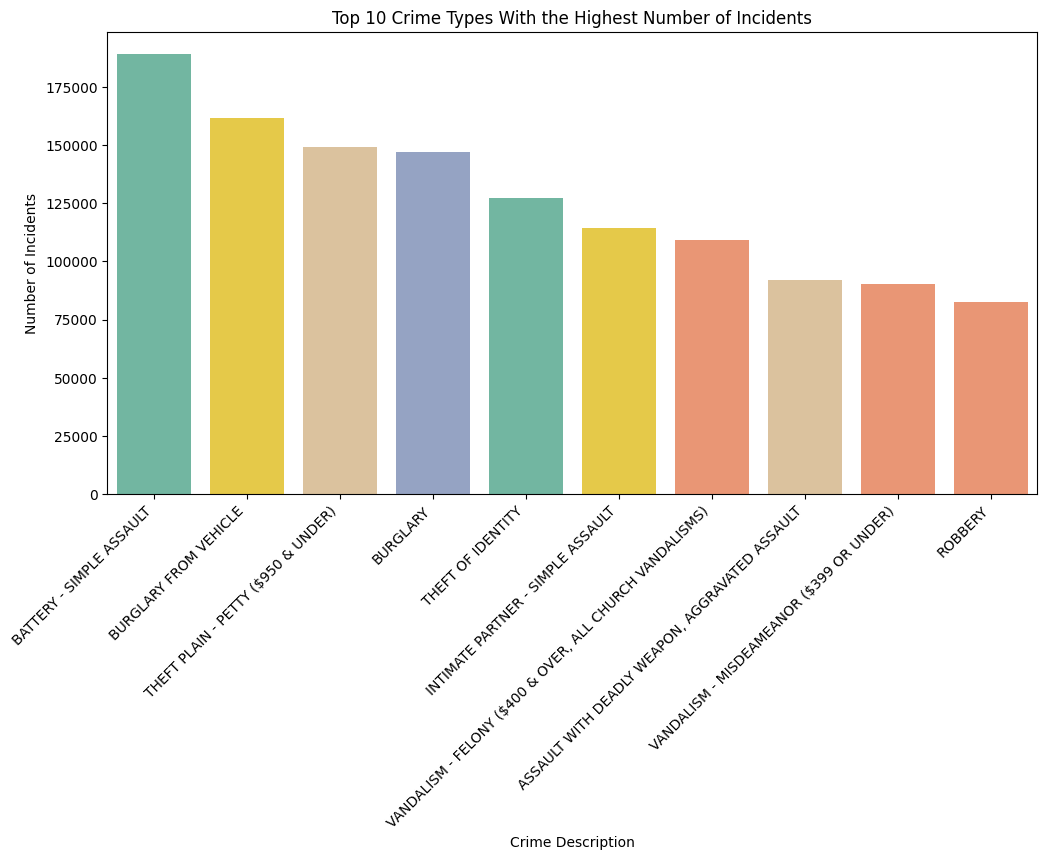

In [36]:
# 15. What are the top 10 crime types with the highest number of incidents?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Crime Description', hue='Crime Description', order=df['Crime Description'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Crime Types With the Highest Number of Incidents')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

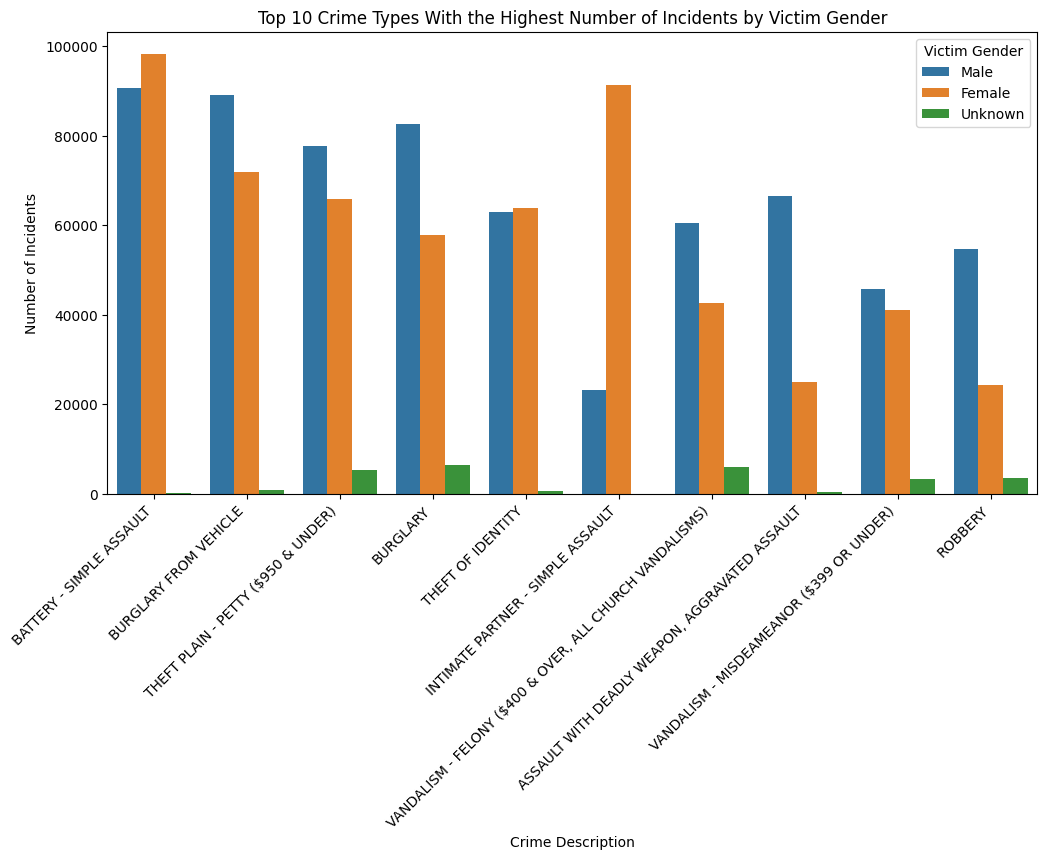

In [37]:
# 16. What are the top 10 crime types with the highest number of incidents by victim gender?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Crime Description', hue='Victim Gender', order=df['Crime Description'].value_counts().nlargest(10).index)
plt.title('Top 10 Crime Types With the Highest Number of Incidents by Victim Gender')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

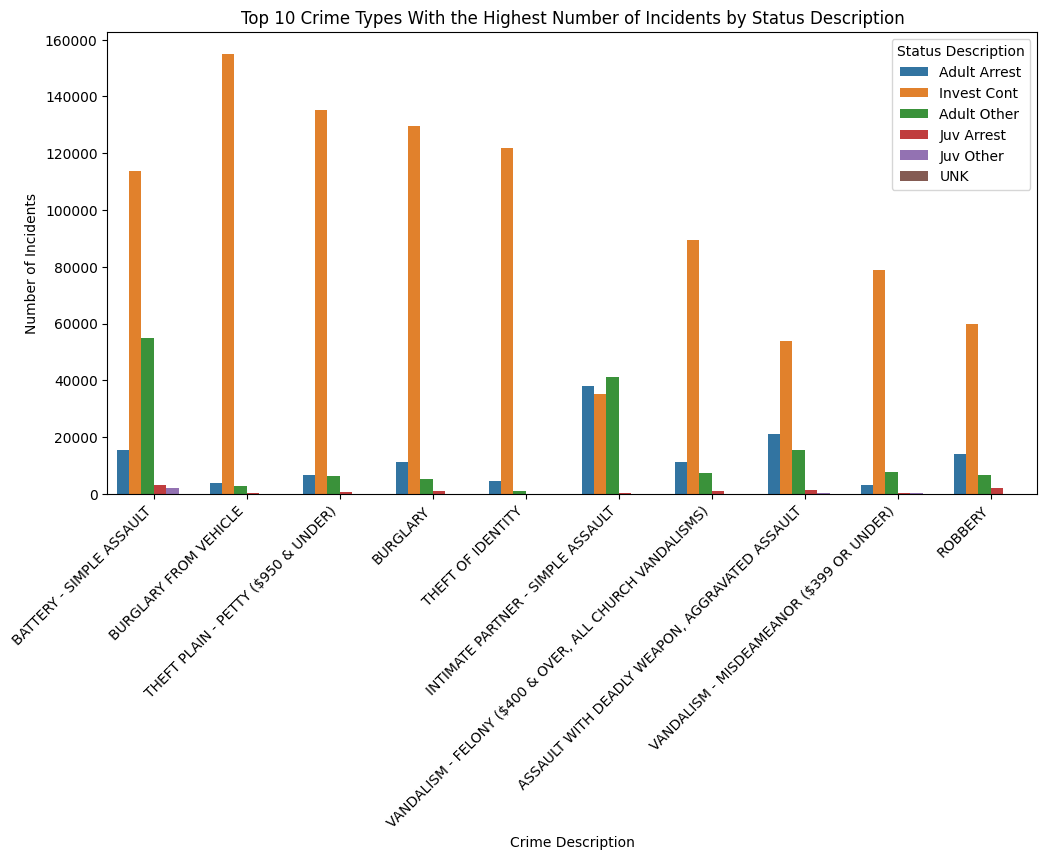

In [38]:
# 17. What are the top 10 crime types with the highest number of incidents by status?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Crime Description', hue='Status Description', order=df['Crime Description'].value_counts().nlargest(10).index)
plt.title('Top 10 Crime Types With the Highest Number of Incidents by Status Description')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
# 17. What are the top 10 crime types with the highest number of incidents by status?
# Grouping the data by 'Crime Description' and 'Status Description' and counting occurrences.
crime_status = df.groupby(['Crime Description', 'Status Description']).size().unstack(fill_value=0)

# Adding a column for the total count of incidents for each crime.
crime_status['Total'] = crime_status.sum(axis=1)

# Sorting the DataFrame by the total count of incidents in descending order and dropping the 'Total' column.
crime_status_sorted = crime_status.sort_values(by='Total', ascending=False).drop('Total', axis=1)
crime_status_sorted.head(10)

Status Description,Adult Arrest,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
Crime Description,,,,,,
BATTERY - SIMPLE ASSAULT,15439,54950,113892,3024,1937,0
BURGLARY FROM VEHICLE,3883,2775,154973,176,54,1
THEFT PLAIN - PETTY ($950 & UNDER),6718,6394,135092,661,153,4
BURGLARY,11094,5368,129452,946,90,3
THEFT OF IDENTITY,4417,967,121972,12,6,1
INTIMATE PARTNER - SIMPLE ASSAULT,37911,41060,35222,303,85,0
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",11142,7549,89468,967,150,2
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",21063,15519,54013,1300,186,1
VANDALISM - MISDEAMEANOR ($399 OR UNDER),3201,7644,78744,432,192,1


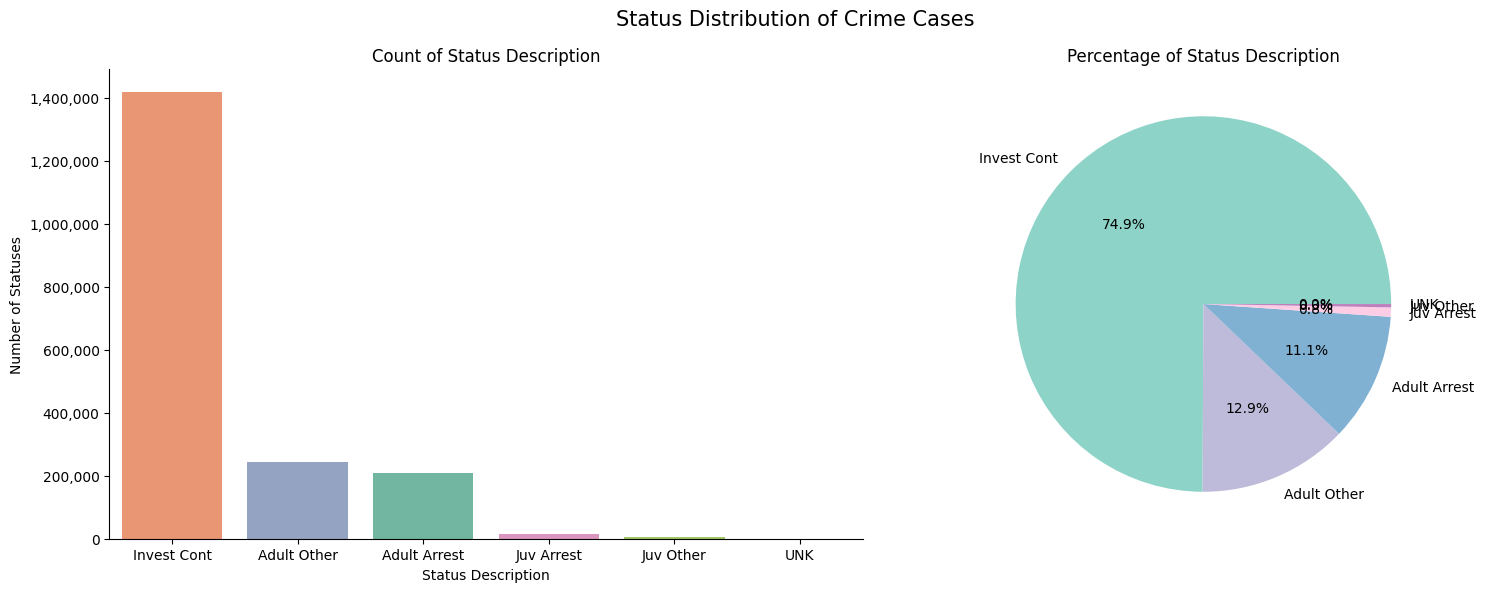

In [40]:
# 18. Are there any significant differences in representation among status description?
fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

# Plot 1: Count Plot
sns.countplot(data=df, x='Status Description', hue='Status Description', order=df['Status Description'].value_counts().index, palette='Set2', legend=False, ax=axs[0])
axs[0].set_title('Count of Status Description')
axs[0].set(ylabel='Number of Statuses')
axs[0].yaxis.set_major_formatter('{:,.0f}'.format)

# Plot 2: Pie Chart
df['Status Description'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colormap='Set3')
axs[1].set_title('Percentage of Status Description')
axs[1].set(ylabel='')

plt.suptitle('Status Distribution of Crime Cases', fontsize=15)
sns.despine()
plt.tight_layout()
plt.show()

In [41]:
# 18. Are there any significant differences in representation among status description?
case_status_counts = df['Status Description'].value_counts().reset_index(name='Number of Statuses')
case_status_counts['Percentage of Statuses'] = (case_status_counts['Number of Statuses'] / case_status_counts['Number of Statuses'].sum()) * 100
case_status_counts

,Status Description,Number of Statuses,Percentage of Statuses
0,Invest Cont,1418557,74.928191
1,Adult Other,244602,12.919879
2,Adult Arrest,209450,11.063151
3,Juv Arrest,15232,0.804554
4,Juv Other,5354,0.282798
5,UNK,27,0.001426


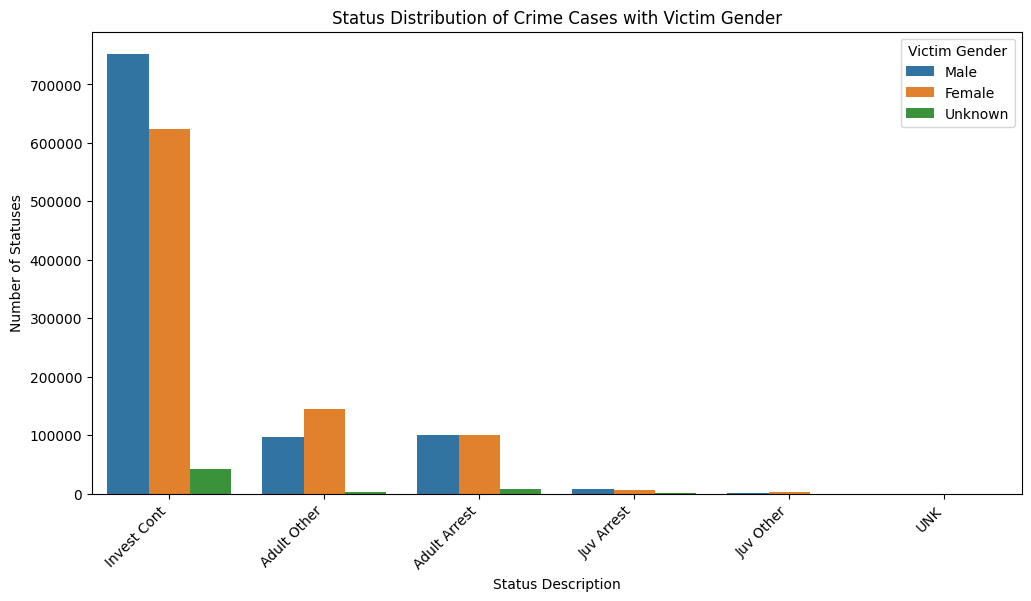

In [42]:
# 19. What are the case statuses of victims, considering the victim's gender?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Status Description', hue='Victim Gender', order=df['Status Description'].value_counts().index)
plt.title('Status Distribution of Crime Cases with Victim Gender')
plt.ylabel('Number of Statuses')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
# 19. What are the case statuses of victims, considering the victim's gender?
# Grouping the data by 'Status Description' and 'Victim Gender' and counting occurrences.
case_status_gender = df.groupby(['Status Description', 'Victim Gender']).size().unstack(fill_value=0)

# Adding a column for the total count of victims for each case status.
case_status_gender['Total'] = case_status_gender.sum(axis=1)

# Sorting the DataFrame by the total count of victims in descending order and dropping the 'Total' column.
case_status_gender_sorted = case_status_gender.sort_values(by='Total', ascending=False).drop('Total', axis=1)
case_status_gender_sorted

Victim Gender,Female,Male,Unknown
Status Description,,,
Invest Cont,624198,752491,41868
Adult Other,144079,97471,3052
Adult Arrest,100721,100540,8189
Juv Arrest,6428,8203,601
Juv Other,3386,1876,92
UNK,13,13,1


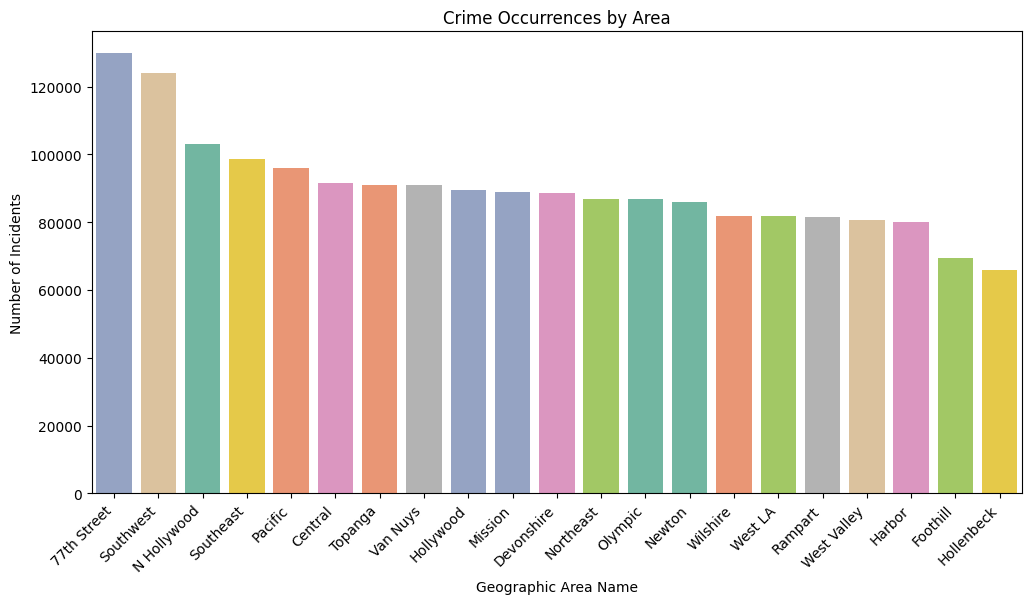

In [44]:
# 20. How do the counts of crime occurrences vary across different areas?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Geographic Area Name', hue='Geographic Area Name', order=df['Geographic Area Name'].value_counts().index.tolist(), palette='Set2', legend=False)
plt.title('Crime Occurrences by Area')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

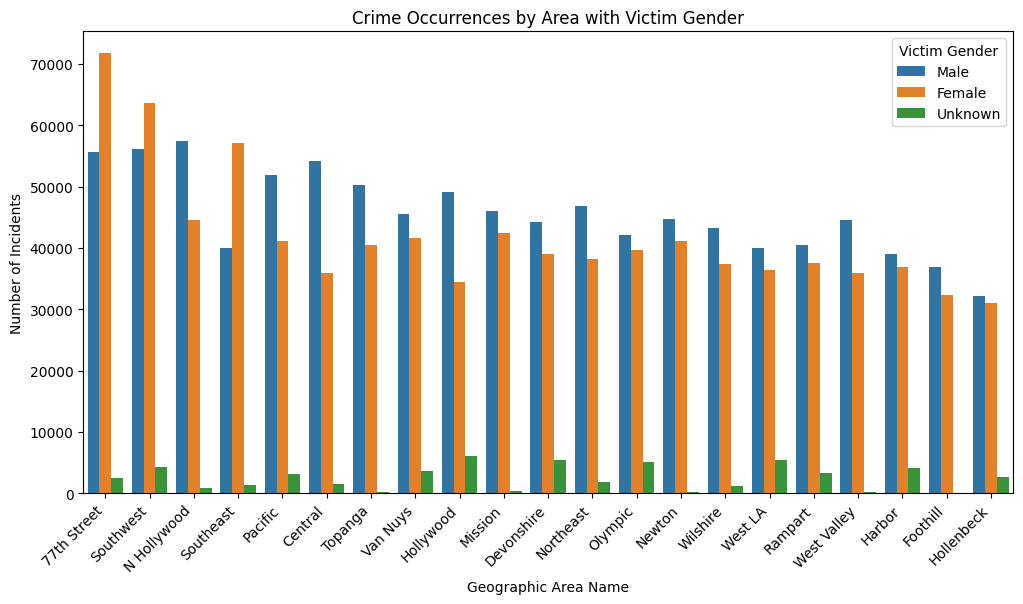

In [45]:
# 20. How do the counts of crime occurrences vary across different areas, considering the victim's gender?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Geographic Area Name', hue='Victim Gender', order=df['Geographic Area Name'].value_counts().index.tolist())
plt.title('Crime Occurrences by Area with Victim Gender')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

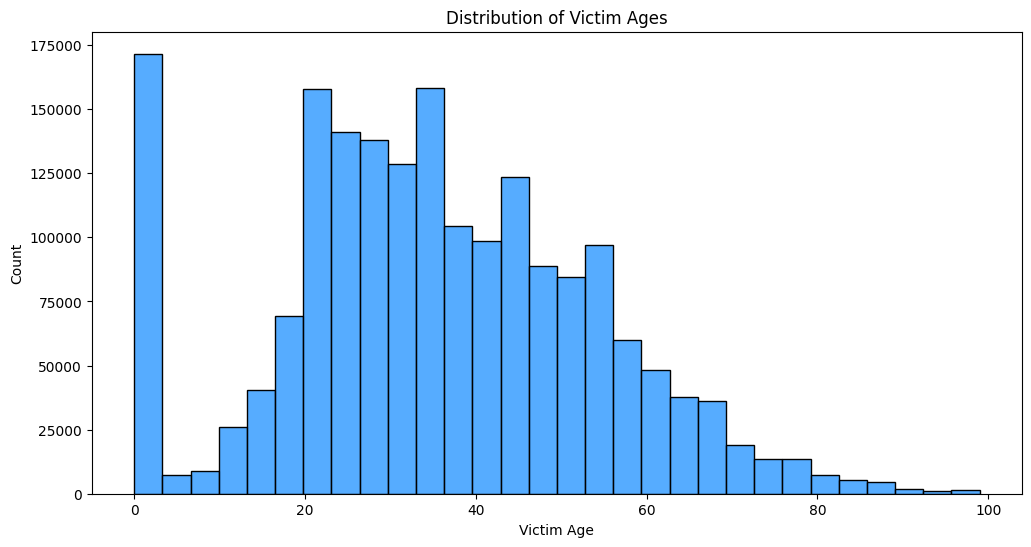

In [46]:
# 21. What is the distribution of victim ages?
plt.figure(figsize=(12, 6), dpi=100)
sns.histplot(data=df, x='Victim Age', bins=30, color='dodgerblue')
plt.title('Distribution of Victim Ages')
plt.show()

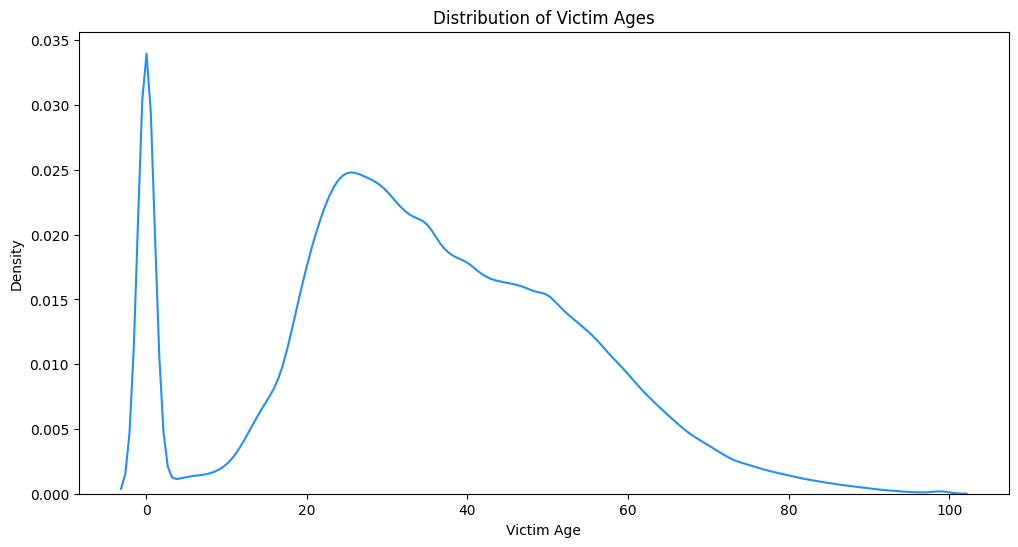

In [47]:
# 21. What is the distribution of victim ages?
plt.figure(figsize=(12, 6), dpi=100)
sns.kdeplot(data=df, x='Victim Age', color='dodgerblue')
plt.title('Distribution of Victim Ages')
plt.show()

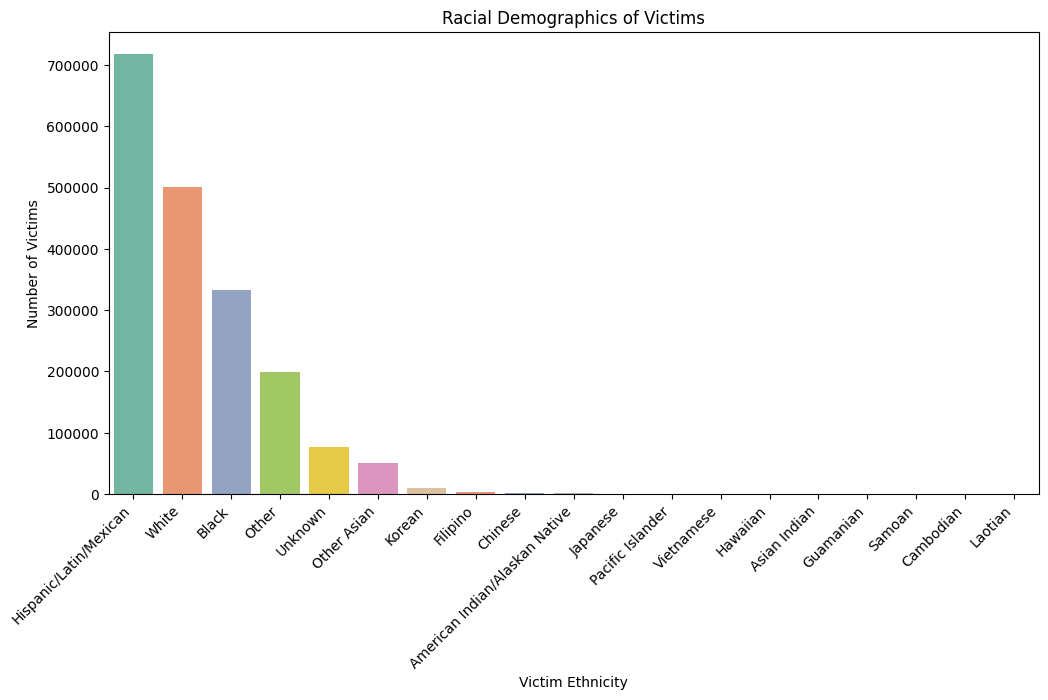

In [48]:
# 22. What are the racial demographics of victims?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Victim Ethnicity', hue='Victim Ethnicity', order=df['Victim Ethnicity'].value_counts().index, palette='Set2', legend=False)
plt.title('Racial Demographics of Victims')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45, ha='right')
plt.show()

In [49]:
# 22. What are the racial demographics of victims?
df['Victim Ethnicity'].value_counts().reset_index(name='Number of Victims')

,Victim Ethnicity,Number of Victims
0,Hispanic/Latin/Mexican,718096
1,White,501233
2,Black,332636
3,Other,199107
4,Unknown,76439
5,Other Asian,50531
6,Korean,9190
7,Filipino,2539
8,Chinese,1073
9,American Indian/Alaskan Native,954


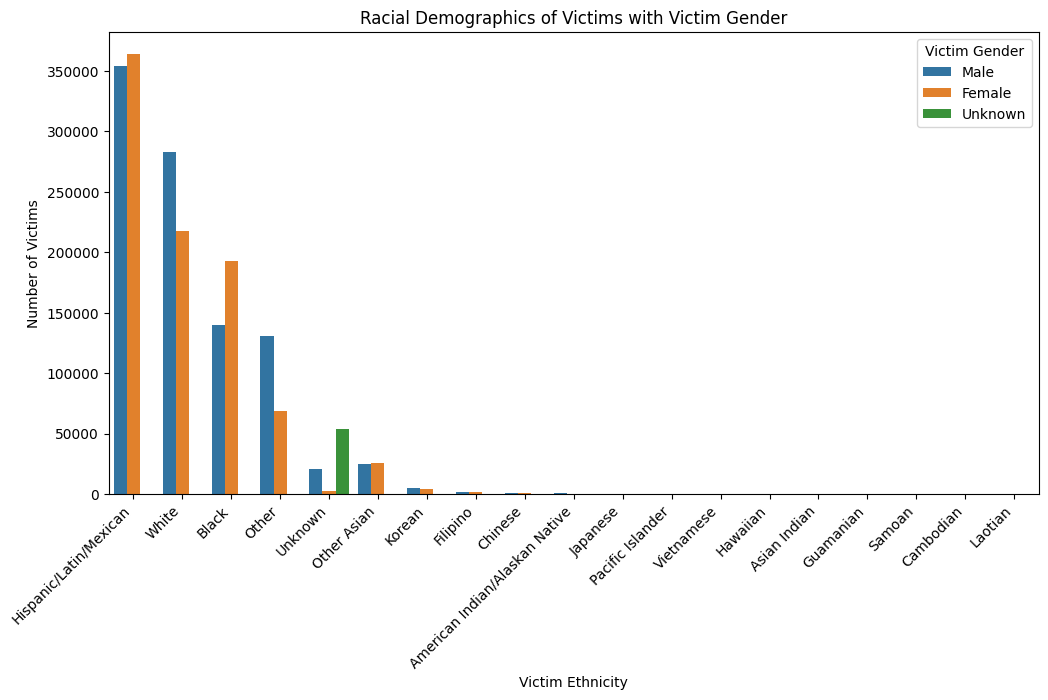

In [50]:
# 22. What are the racial demographics of victims, considering the victim's gender?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Victim Ethnicity', hue='Victim Gender', order=df['Victim Ethnicity'].value_counts().index)
plt.title('Racial Demographics of Victims with Victim Gender')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45, ha='right')
plt.show()

In [51]:
# 22. What are the racial demographics of victims, considering the victim's gender?
# Grouping the data by 'Victim Ethnicity' and 'Victim Gender' and counting occurrences.
racial_demographics = df.groupby(['Victim Ethnicity', 'Victim Gender']).size().unstack(fill_value=0)

# Adding a column for the total count of victims for each ethnicity.
racial_demographics['Total'] = racial_demographics.sum(axis=1)

# Sorting the DataFrame by the total count of victims in descending order and dropping the 'Total' column.
racial_demographics_sorted = racial_demographics.sort_values(by='Total', ascending=False).drop('Total', axis=1)
racial_demographics_sorted

Victim Gender,Female,Male,Unknown
Victim Ethnicity,,,
Hispanic/Latin/Mexican,364129,353940,27
White,217999,283214,20
Black,192431,140188,17
Other,68786,130297,24
Unknown,2369,20362,53708
Other Asian,25736,24793,2
Korean,4434,4755,1
Filipino,1349,1188,2
Chinese,546,525,2


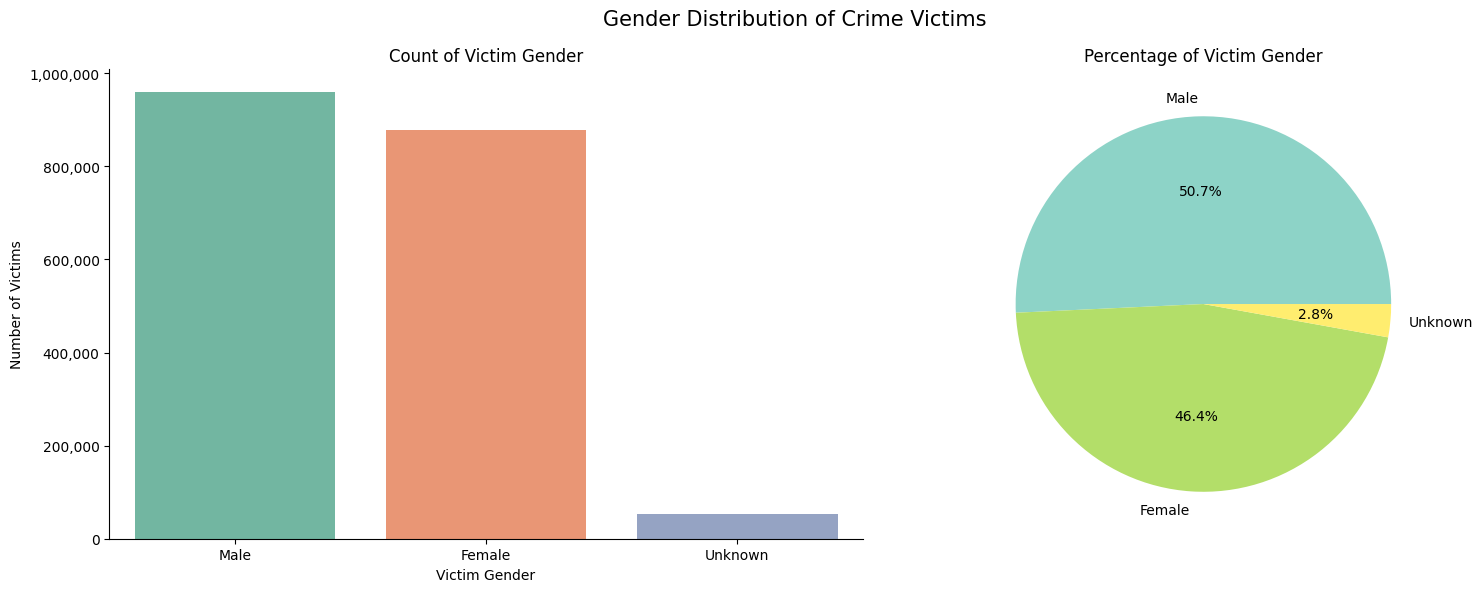

In [52]:
# 23. Are there any significant differences between male and female representation among crime victims?
fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

# Plot 1: Count Plot
sns.countplot(data=df, x='Victim Gender', hue='Victim Gender', order=df['Victim Gender'].value_counts().index, palette='Set2', legend=False, ax=axs[0])
axs[0].set_title('Count of Victim Gender')
axs[0].set(ylabel='Number of Victims')
axs[0].yaxis.set_major_formatter('{:,.0f}'.format)

# Plot 2: Pie Chart
df['Victim Gender'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colormap='Set3')
axs[1].set_title('Percentage of Victim Gender')
axs[1].set(ylabel='')

plt.suptitle('Gender Distribution of Crime Victims', fontsize=15)
sns.despine()
plt.tight_layout()
plt.show()

In [53]:
# 23. Are there any significant differences between male and female representation among crime victims?
gender_counts = df['Victim Gender'].value_counts().reset_index(name='Number of Victims')
gender_counts['Percentage of Victims'] = (gender_counts['Number of Victims'] / gender_counts['Number of Victims'].sum()) * 100
gender_counts

,Victim Gender,Number of Victims,Percentage of Victims
0,Male,960594,50.738582
1,Female,878825,46.419543
2,Unknown,53803,2.841875


In [54]:
# 24. How many different time lengths are present?
# Initialize dictionaries to store counts and percentages.
counts = {}
percentages = {}

# Loop over all possible lengths of time formats.
for length in range(1, 6):
    count = sum(1 for time in df['Time Occurred'] if isinstance(time, int) and len(str(time)) == length)
    percentage = (count / len(df)) * 100
    counts[length] = count
    percentages[length] = percentage

# Create a DataFrame with counts and percentages.
data = {'Count': counts.values(), 'Percentage': percentages.values()}
index = [f'{length} digits' for length in counts.keys()]

result_df = pd.DataFrame(data, index=index)
result_df

,Count,Percentage
1 digits,45688,2.413240
2 digits,35368,1.868138
3 digits,418983,22.130685
4 digits,1393183,73.587936
5 digits,0,0.000000


In [55]:
# Ensure the 'Time Occurred' column is padded with zeros to be four characters long. Leading zeros were removed when the column was treated as integers, but they are necessary for the 24-hour military time format.
df['Time Occurred'] = df['Time Occurred'].astype(str).str.zfill(4)

In [56]:
# Convert the 'Time Occurred' column to a datetime object for consistency.
df['Time Occurred'] = pd.to_datetime(df['Time Occurred'], format='%H%M').dt.time

In [57]:
# Extract hour information from the 'Time Occurred' column and assign it to a new column.
df['Hour'] = pd.to_datetime(df['Time Occurred'], format='%H:%M:%S').dt.hour

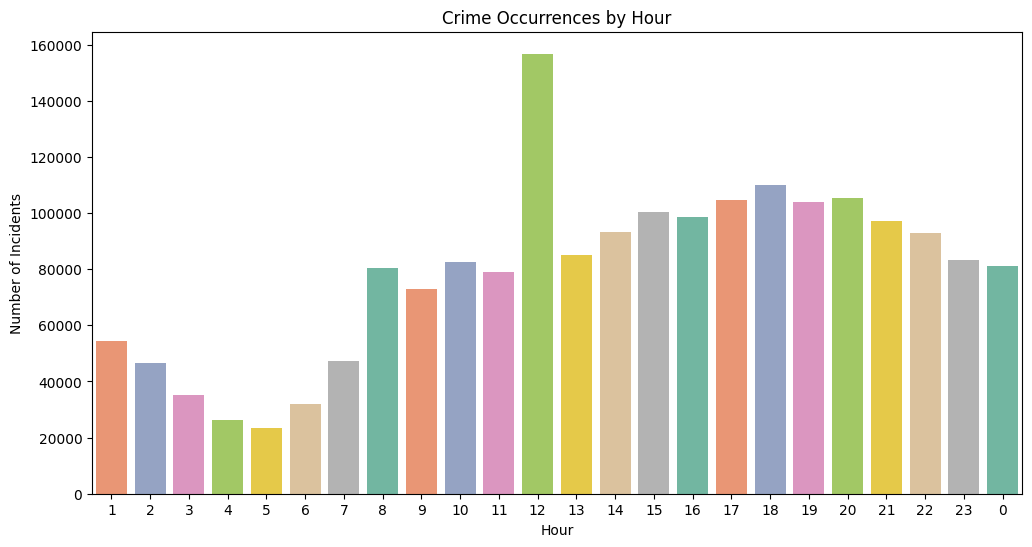

In [58]:
# 25. How do the counts of crime occurrences vary across different hours?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Hour', hue='Hour', order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0], palette='Set2', legend=False)
plt.title('Crime Occurrences by Hour')
plt.ylabel('Number of Incidents')
plt.show()

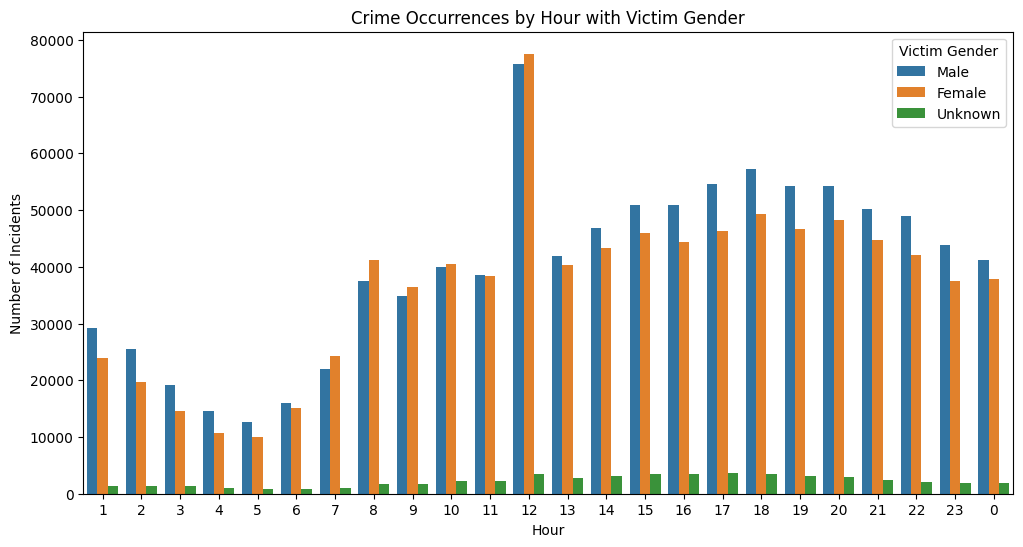

In [59]:
# 25. How do the counts of crime occurrences vary across different hours, considering the victim's gender?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Hour', hue='Victim Gender', order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0])
plt.title('Crime Occurrences by Hour with Victim Gender')
plt.ylabel('Number of Incidents')
plt.show()

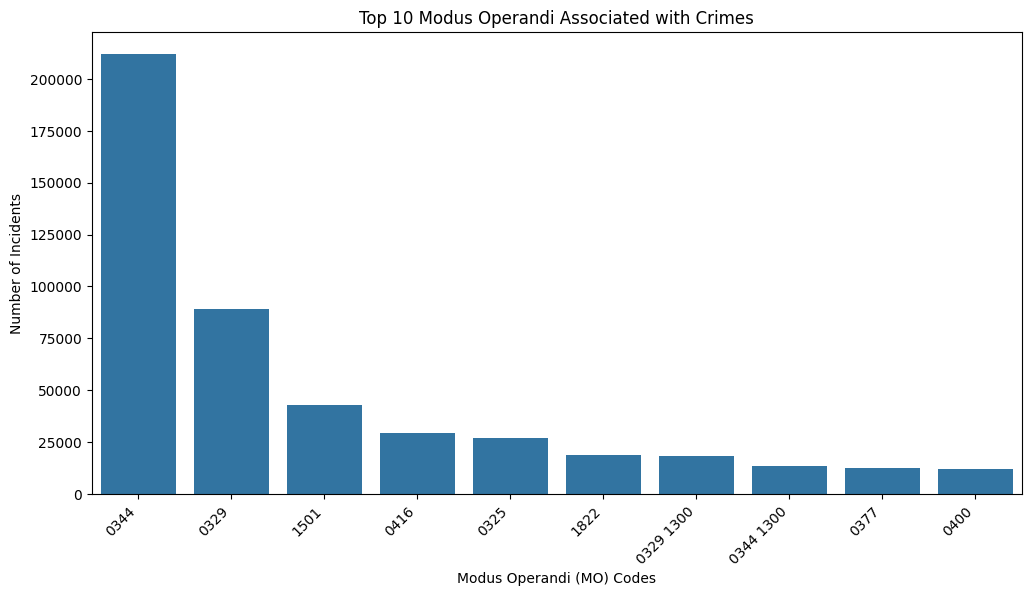

In [60]:
# 26. What are the top 10 modus operandi associated with crimes?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Modus Operandi (MO) Codes', order=df['Modus Operandi (MO) Codes'].value_counts().nlargest(10).index)
plt.title('Top 10 Modus Operandi Associated with Crimes')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [61]:
# 26. What are the top 10 modus operandi associated with crimes?
df['Modus Operandi (MO) Codes'].value_counts().nlargest(10).reset_index(name='Number of Incidents')

,Modus Operandi (MO) Codes,Number of Incidents
0,0344,211931
1,0329,89122
2,1501,42979
3,0416,29216
4,0325,27063
5,1822,18583
6,0329 1300,18138
7,0344 1300,13589
8,0377,12338
9,0400,12149


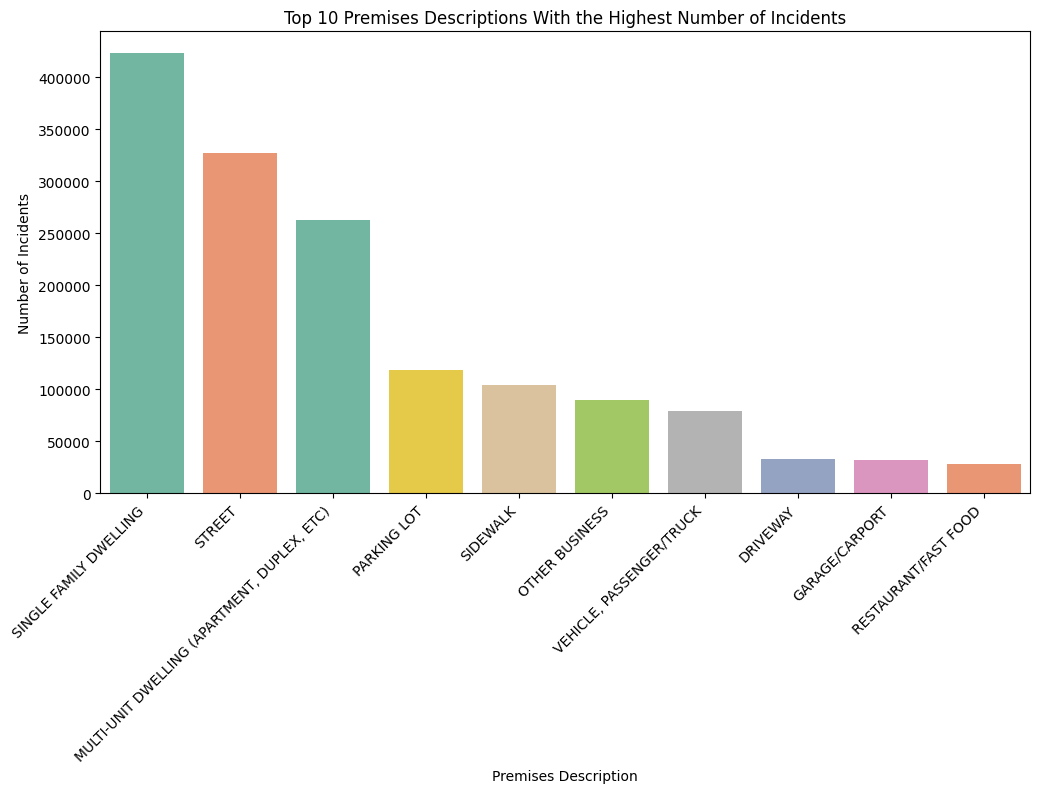

In [62]:
# 27. What are the top 10 premises descriptions with the highest number of incidents?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Premises Description', hue='Premises Description', order=df['Premises Description'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Premises Descriptions With the Highest Number of Incidents')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [63]:
# 27. What are the top 10 premises descriptions with the highest number of incidents?
df['Premises Description'].value_counts().nlargest(10).reset_index(name='Number of Incidents')

,Premises Description,Number of Incidents
0,SINGLE FAMILY DWELLING,422780
1,STREET,326701
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",262253
3,PARKING LOT,118121
4,SIDEWALK,104545
5,OTHER BUSINESS,89564
6,"VEHICLE, PASSENGER/TRUCK",79589
7,DRIVEWAY,33284
8,GARAGE/CARPORT,32537
9,RESTAURANT/FAST FOOD,28499


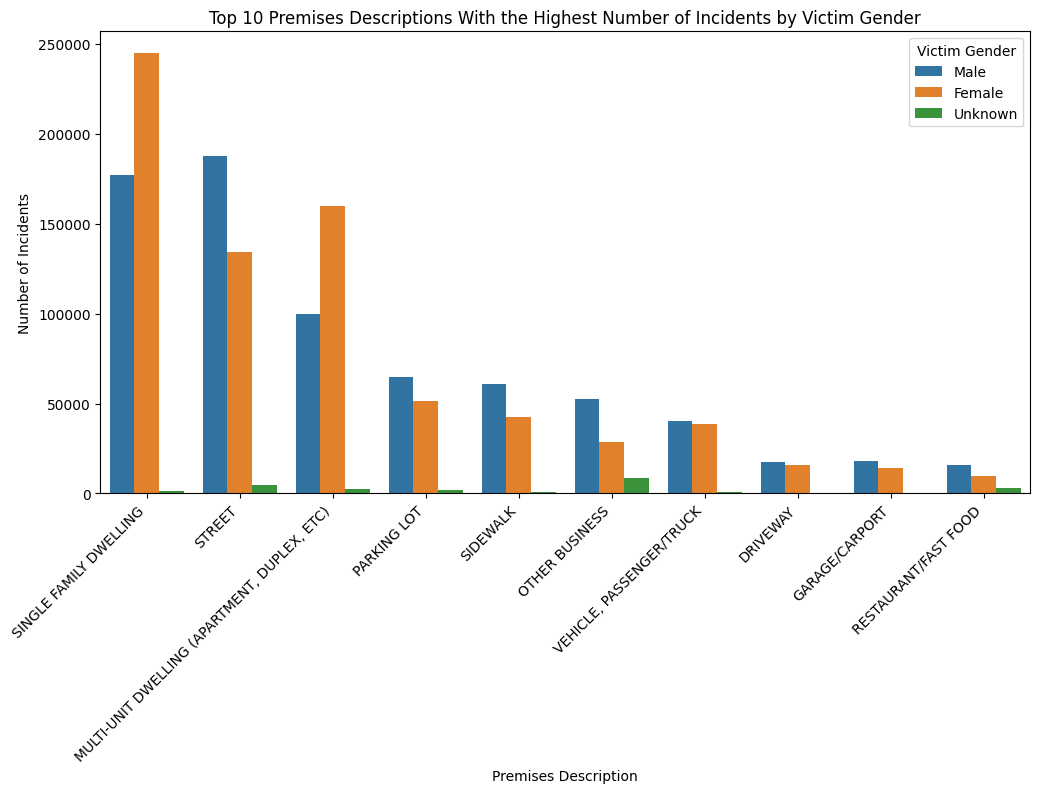

In [64]:
# 28. What are the top 10 premises descriptions with the highest number of incidents by victim gender?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Premises Description', hue='Victim Gender', order=df['Premises Description'].value_counts().nlargest(10).index)
plt.title('Top 10 Premises Descriptions With the Highest Number of Incidents by Victim Gender')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [65]:
# 28. What are the top 10 premises descriptions with the highest number of incidents by victim gender?
# Grouping the data by 'Premises Description' and 'Victim Gender' and counting occurrences.
premises_gender = df.groupby(['Premises Description', 'Victim Gender']).size().unstack(fill_value=0)

# Adding a column for the total count of incidents for each crime.
premises_gender['Total'] = premises_gender.sum(axis=1)

# Sorting the DataFrame by the total count of victims in descending order and dropping the 'Total' column.
premises_gender_sorted = premises_gender.sort_values(by='Total', ascending=False).drop('Total', axis=1)
premises_gender_sorted.head(10)

Victim Gender,Female,Male,Unknown
Premises Description,,,
SINGLE FAMILY DWELLING,244689,176983,1108
STREET,134143,187841,4717
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",159963,99942,2348
PARKING LOT,51655,64838,1628
SIDEWALK,42403,61103,1039
OTHER BUSINESS,28449,52414,8701
"VEHICLE, PASSENGER/TRUCK",38756,40185,648
DRIVEWAY,15532,17641,111
GARAGE/CARPORT,14356,18022,159


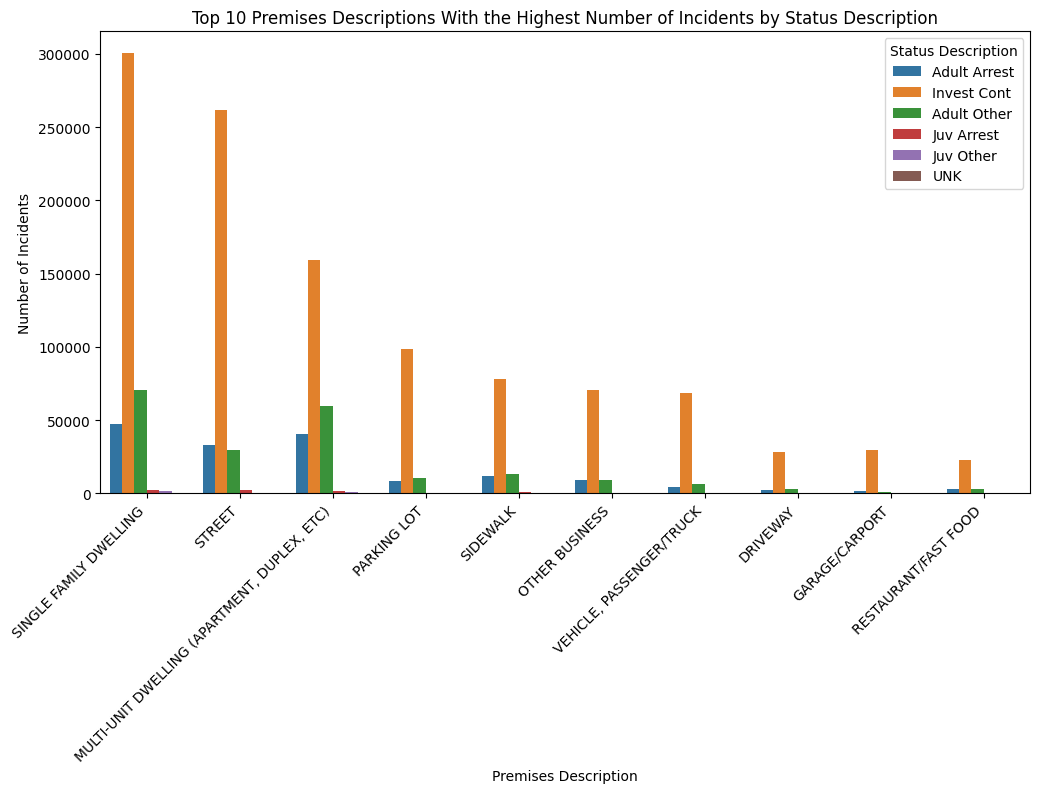

In [66]:
# 29. What are the top 10 premises descriptions with the highest number of incidents by status?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Premises Description', hue='Status Description', order=df['Premises Description'].value_counts().nlargest(10).index)
plt.title('Top 10 Premises Descriptions With the Highest Number of Incidents by Status Description')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [67]:
# 29. What are the top 10 premises descriptions with the highest number of incidents by status?
# Grouping the data by 'Premises Description' and 'Status Description' and counting occurrences.
premises_status = df.groupby(['Premises Description', 'Status Description']).size().unstack(fill_value=0)

# Adding a column for the total count of incidents for each crime.
premises_status['Total'] = premises_status.sum(axis=1)

# Sorting the DataFrame by the total count of incidents in descending order and dropping the 'Total' column.
premises_status_sorted = premises_status.sort_values(by='Total', ascending=False).drop('Total', axis=1)
premises_status_sorted.head(10)

Status Description,Adult Arrest,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
Premises Description,,,,,,
SINGLE FAMILY DWELLING,47696,70819,300314,2589,1355,7
STREET,32706,29815,261467,2332,376,5
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",40508,59958,159332,1576,876,3
PARKING LOT,8613,10514,98523,369,102,0
SIDEWALK,11947,13352,77812,1203,230,1
OTHER BUSINESS,9344,9094,70615,436,70,5
"VEHICLE, PASSENGER/TRUCK",4393,6173,68795,152,75,1
DRIVEWAY,2003,2756,28408,88,29,0
GARAGE/CARPORT,1361,1268,29862,38,8,0
